In [57]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import joblib

In [58]:
df = pd.read_csv("../data/processed/telco_clean.csv")

In [59]:
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()
X_scaled = StandardScaler().fit_transform(features)

In [60]:
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

In [67]:
kmeans = KMeans(n_clusters = 4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

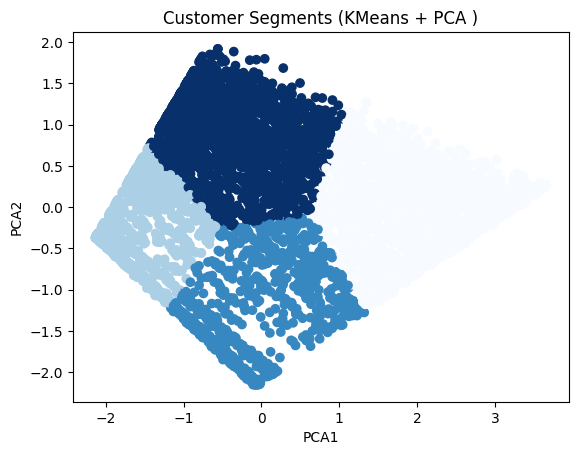

In [68]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap='Blues')
plt.title("Customer Segments (KMeans + PCA )")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.savefig("../reports/figures/clusters.png")
plt.show()

In [72]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering
sil_score = silhouette_score(X_scaled, clusters)
db_index = davies_bouldin_score(X_scaled, clusters)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)



Silhouette Score: 0.47228202529248003
Davies-Bouldin Index: 0.707340803419551
